In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_csv("/content/netflix_titles_nov_2019.csv.zip")
df.head()
df['country'].unique()[:20]

array(['South Korea', nan, 'India', 'France, Senegal, Belgium',
       'Canada, United Kingdom', 'Nigeria', 'France', 'South Africa',
       'United States, Spain, Colombia, Mexico', 'United States', 'Japan',
       'Brazil', 'Germany, Canada, United States', 'Canada, Norway',
       'Poland', 'Mexico', 'China', 'United States, United Arab Emirates',
       'United States, Japan', 'Spain'], dtype=object)

In [7]:
df.shape
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
count,5.837000e+03,5837,3936,5281,5410,5195,5837.000000,5827,5837,5837,5837,5837
unique,NaN,5780,3108,5087,527,1092,NaN,14,194,449,5829,2
top,NaN,Oh My Ghost,"Raúl Campos, Jan Suter",David Attenborough,United States,"November 1, 2019",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,Movie
freq,NaN,3,18,18,1907,94,NaN,1937,1259,297,3,3939
mean,7.730079e+07,NaN,NaN,NaN,NaN,NaN,2013.688539,NaN,NaN,NaN,NaN,NaN
std,9.479777e+06,NaN,NaN,NaN,NaN,NaN,8.419088,NaN,NaN,NaN,NaN,NaN
min,2.698800e+05,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,NaN
25%,8.004520e+07,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN
50%,8.016353e+07,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN
75%,8.024188e+07,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()


,0
show_id,0
title,0
director,1901
cast,556
country,427
date_added,642
release_year,0
rating,10
duration,0
listed_in,0


In [9]:
#data cleaning#
df.drop_duplicates(inplace=True)
df['country']=df['country'].fillna('Unknown')
df['director']=df['director'].fillna('Not Specified')
df['cast']=df['cast'].fillna('Not Specified')


/tmp/ipython-input-3528165346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='coolwarm', legend=False)


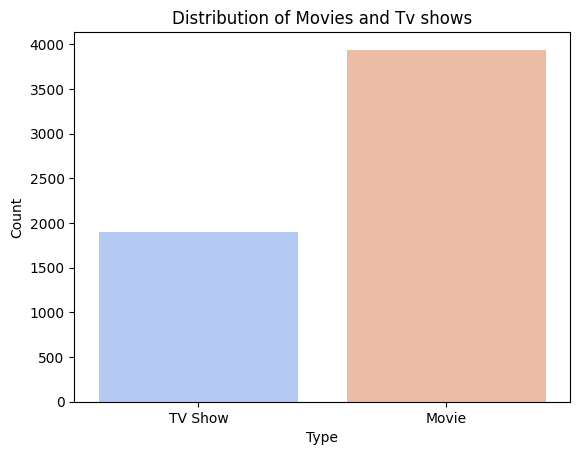

In [10]:
#data visualization#
sns.countplot(data=df,x='type',palette='coolwarm', legend=False)
plt.title("Distribution of Movies and Tv shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2536926688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index,palette='coolwarm')


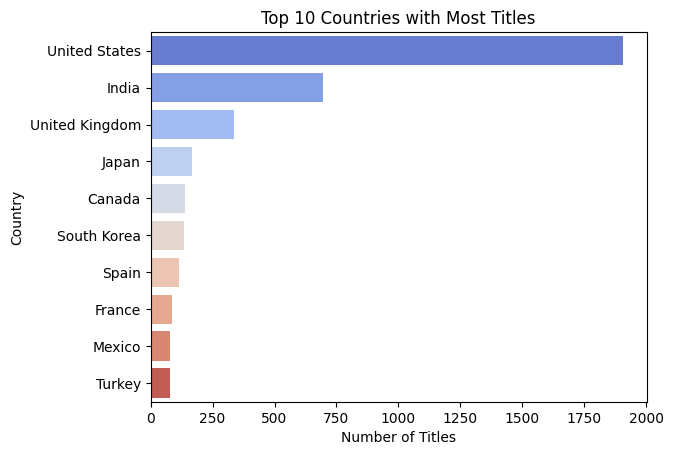

In [13]:
top_countries=df[df['country']!= 'Unknown']['country'].value_counts().head(10)
sns.barplot(x=top_countries.values,y=top_countries.index,palette='coolwarm')
plt.title('Top 10 Countries with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-902888115.py:9: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x',nbins=15)


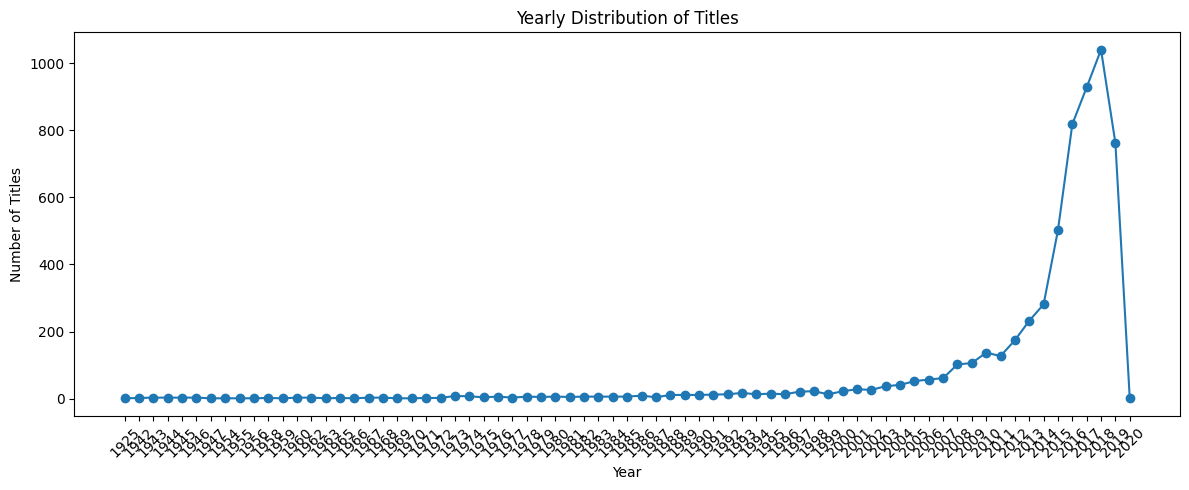

In [15]:

df["release_year"]=df["release_year"].astype(str)
yearly=df["release_year"].value_counts().sort_index()
plt.figure(figsize=(12,5))
plt.plot(yearly.index,yearly.values,marker='o')
plt.title("Yearly Distribution of Titles")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.locator_params(axis='x',nbins=15)
plt.tight_layout()
plt.show()

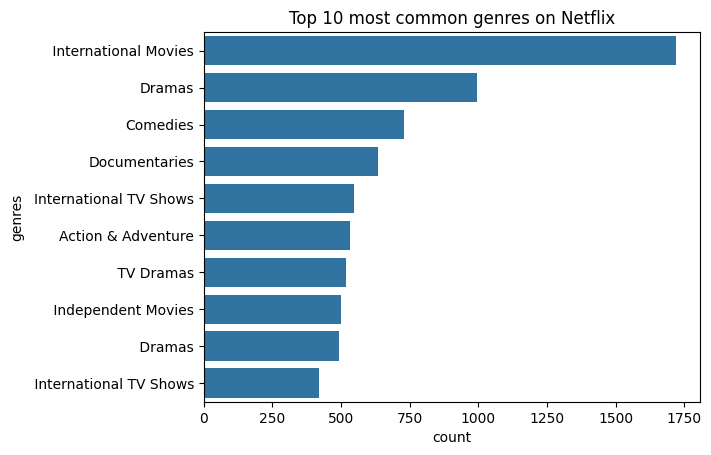

In [29]:

from collections import Counter
genre=[]
for i in df["listed_in"]:
  genre.extend(i.split(","))
genre_count=Counter(genre).most_common(10)
genres,counts=zip(*genre_count)
sns.barplot(x=list(counts),y=list(genres))
plt.title('Top 10 most common genres on Netflix')
plt.xlabel('count')
plt.ylabel('genres')
plt.show()

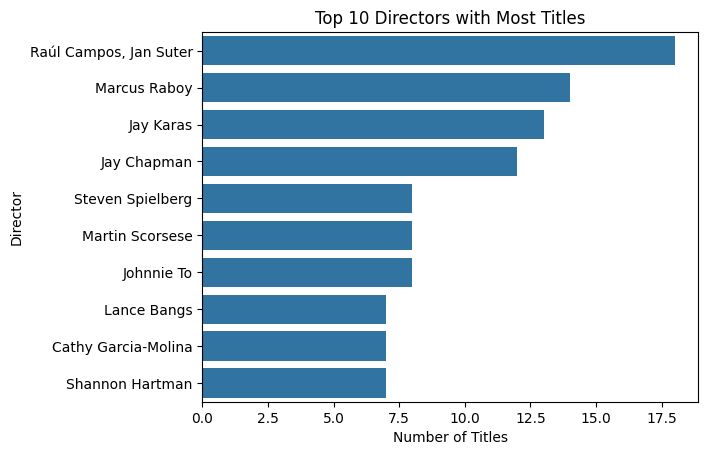

In [24]:
top_directors=df[df['director']!='Not Specified']['director'].value_counts().head(10)
sns.barplot(x=top_directors.values,y=top_directors.index)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.title('Top 10 Directors with Most Titles')
plt.show()


In [28]:
df['type'].unique()
df[df['type']=='TV Show']['country'].value_counts().head(10)


,count
country,
United States,532
Unknown,257
United Kingdom,174
Japan,124
South Korea,101
Taiwan,65
India,52
Canada,52
Australia,39
